In [7]:
# Menyiapkan folder datasets
import os

In [10]:
# Menghapus file untuk mempersiapkan datasets
os.remove('rps-cv-images/README_rpc-cv-images.txt')

In [12]:
# Split dataset di ImageDataGenerator menjadi traning set dan validation set.
from tensorflow.keras.preprocessing.image import ImageDataGenerator

dataset = 'rps-cv-images'

datagen = ImageDataGenerator(rescale= 1./255,
                             validation_split=0.2,
                             horizontal_flip = True,
                             vertical_flip = True,
                             )

train_generator = datagen.flow_from_directory(
    dataset,
    target_size =  (200,200),
    subset='training'
)

val_generator = datagen.flow_from_directory(
    dataset,
    target_size =  (200,200),
    subset='validation'
)

Found 1751 images belonging to 3 classes.
Found 437 images belonging to 3 classes.


In [13]:
# Membuat model sequential
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [14]:
# Optimezer menggunakan Adam dan loss_reduction menggunakan categorical crossentropy karena class ada tiga
model.compile( optimizer= tf.keras.optimizers.Adam() ,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
# Melatih model
model.fit(
      train_generator,
      steps_per_epoch=30, 
      epochs=20,
      validation_data=val_generator,
      validation_steps=5, 
      verbose=2)

Epoch 1/20
30/30 - 51s - loss: 0.9663 - accuracy: 0.5323 - val_loss: 0.6340 - val_accuracy: 0.7875
Epoch 2/20
30/30 - 42s - loss: 0.3656 - accuracy: 0.8759 - val_loss: 0.5048 - val_accuracy: 0.8188
Epoch 3/20
30/30 - 40s - loss: 0.2835 - accuracy: 0.9094 - val_loss: 0.2739 - val_accuracy: 0.9062
Epoch 4/20
30/30 - 46s - loss: 0.1843 - accuracy: 0.9464 - val_loss: 0.1918 - val_accuracy: 0.9250
Epoch 5/20
30/30 - 47s - loss: 0.1871 - accuracy: 0.9453 - val_loss: 0.1431 - val_accuracy: 0.9688
Epoch 6/20
30/30 - 38s - loss: 0.1602 - accuracy: 0.9485 - val_loss: 0.1084 - val_accuracy: 0.9625
Epoch 7/20
30/30 - 38s - loss: 0.1623 - accuracy: 0.9527 - val_loss: 0.0800 - val_accuracy: 0.9625
Epoch 8/20
30/30 - 41s - loss: 0.1242 - accuracy: 0.9621 - val_loss: 0.1188 - val_accuracy: 0.9750
Epoch 9/20
30/30 - 40s - loss: 0.1102 - accuracy: 0.9727 - val_loss: 0.1810 - val_accuracy: 0.9500
Epoch 10/20
30/30 - 41s - loss: 0.0962 - accuracy: 0.9727 - val_loss: 0.1142 - val_accuracy: 0.9438
Epoch 11/

<PIL.Image.Image image mode=RGB size=200x200 at 0x1D587E9EB80>
gunting


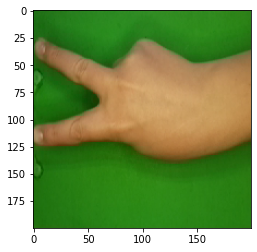

In [20]:
# Image prediction

import numpy as np
# from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# predicting images
path = "coba3.png"
img = image.load_img(path, target_size=(200,200))
imgplot = plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
 
images = np.vstack([x])
classes = model.predict(images, batch_size=10)
  
classes = classes[0]
classes = classes.astype(int)

print(img)
if classes[0]==1:
    print('kertas')
elif classes[1]==1:
    print('batu')
elif classes[2]==1:
    print('gunting')